In [71]:
import numpy as np
TestPerf = np.load("Test_Performance_CIFAR_FF_10.npy")
ValError = np.load("Val_Acc_Record_CIFAR_FF_10.npy")

In [72]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

10


In [73]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [74]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

In [75]:
TestPerf_Mean

array([[1.82625042, 0.44531999],
       [1.89689046, 0.44223999],
       [1.87001644, 0.43978998]])

In [76]:
TestPerf_Mean + TestPerf_StE

array([[1.82960517, 0.44684372],
       [1.90066934, 0.44349268],
       [1.8739211 , 0.44093859]])

In [77]:
TestPerf_Mean - TestPerf_StE

array([[1.82289567, 0.44379625],
       [1.89311158, 0.4409873 ],
       [1.86611178, 0.43864138]])

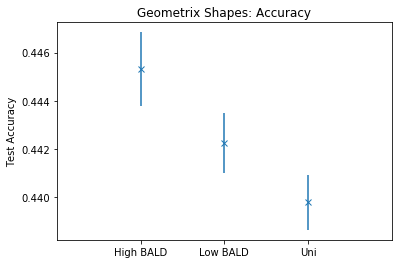

In [78]:
import matplotlib.pyplot as plt

flag = 1

plt.errorbar(np.array([1,2,3],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['High BALD','Low BALD','Uni']
plt.xticks(np.array([1,2,3],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,4)
# thisplot.set_ylim(0.435,0.45)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

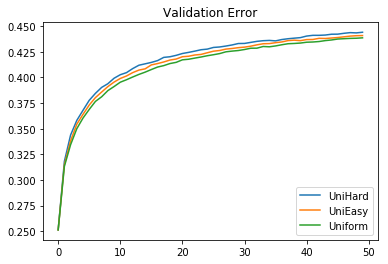

In [79]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

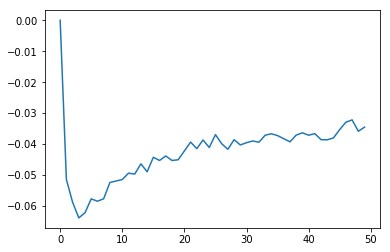

In [26]:
Diff = np.mean(ValError[:,0,:],axis=1) - np.mean(ValError[:,-1,:],axis=1)
plt.plot(Diff)
plt.show()

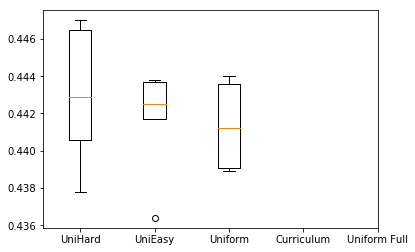

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,1,:]
ax.boxplot(data.T)
my_xticks =['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
plt.show()

In [70]:
Results = np.load('CIFAR_Dynamic_Perf_BALD_Easy.npy')
Results = Results.transpose()
Results = Results[0:2,:]

Results2 = np.load('CIFAR_Dynamic_Perf_BALD_Easy_2.npy')
Results2 = Results2.transpose()
Results2 = Results2[0:3,:]

Results = np.append(Results,Results2,axis=0)
Results

array([[0.7142, 0.7214],
       [0.7127, 0.7256],
       [0.6943, 0.7309],
       [0.7229, 0.7338],
       [0.7187, 0.7252]])

In [71]:
MeanResults = Results.mean(axis=0)
StdResults = Results.std(axis=0)/np.sqrt(Results.shape[0])

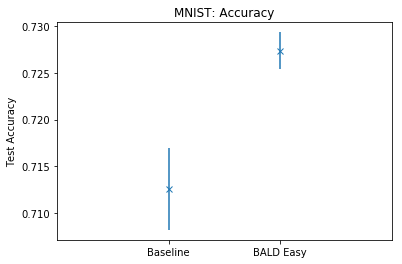

In [72]:
import matplotlib.pyplot as plt

flag = 1

plt.errorbar(np.array([1,2],dtype=int),MeanResults,yerr = StdResults,marker ='x',linestyle='none')
my_xticks = ['Baseline','BALD Easy']
plt.xticks(np.array([1,2],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,3)
if flag == 0:
    thisplot.set_title('MNIST: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('MNIST: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

In [58]:
Results

array([[0.7142, 0.7214],
       [0.7127, 0.7256],
       [0.6943, 0.7309]])